Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [25]:
%matplotlib inline
import thinkstats2
import thinkplot
import brfss

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [26]:
df = brfss.ReadBrfss()
print df

        age  sex     wtyrago      finalwt   wtkg2  htm3
0        82    2   76.363636   185.870345   70.91   157
1        65    2   72.727273   126.603027   72.73   163
2        48    2         NaN   181.063210     NaN   165
3        61    1   73.636364   517.926275   73.64   170
4        26    1   88.636364  1252.624630   88.64   185
5        42    1  118.181818   415.161314  109.09   183
6        40    2   50.000000   422.810541   50.00   157
7        24    2  131.818182  1280.585980  122.73   178
8        37    1   87.727273  1245.060440   90.00   178
9        65    1   77.272727   382.738158   77.27   173
10       28    1   52.272727  3131.561570   63.64   170
11       68    2   86.363636   506.412109   78.18   168
12       40    2   62.727273   422.810541   62.73   175
13       49    1  127.272727   274.170333  127.27   183
14       24    2   95.454545  2561.171960   95.45   175
15       49    2   88.636364   181.063210   88.64   157
16       36    2  113.636364   211.405271   90.9

In [27]:
df = df.dropna(subset=['htm3', 'wtkg2'])
height = df.htm3 
weight = df.wtkg2
logweight = np.log10(weight)
inter, slope = thinkstats2.LeastSquares(height, logweight)
print "Log weight vs height"
print "Intercept: ",inter
print "Slope: ",slope

Log weight vs height
Intercept:  0.993080416392
Slope:  0.00528145416942


In [28]:
inter2, slope2 = thinkstats2.LeastSquares(height, weight)
print "Weight vs height"
print "Intercept: ",inter2
print "Slope: ",slope2

Weight vs height
Intercept:  -82.6592605441
Slope:  0.957074585033


The intercept above is claiming average weight to be -82kg when height is 0, which is apparently not convicing. So we'll turn to look at the intercept at the average height.

In [29]:
avgheight = height.mean()
intercept = avgheight* slope2 + inter2
print "Average height: ",avgheight
print "Interception at average height: ", intercept

Average height:  168.956188484
Interception at average height:  79.044413438


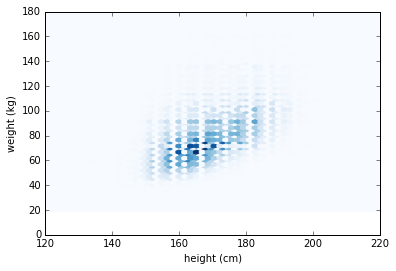

In [30]:
thinkplot.HexBin(height, weight)
thinkplot.Show(xlabel='height (cm)', ylabel='weight (kg)',axis=[120,220,0,180])

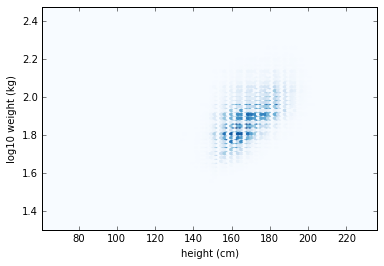

In [31]:
thinkplot.HexBin(height, logweight)
thinkplot.Show(xlabel='height (cm)', ylabel='log10 weight (kg)')

If we want to quantify the correlation between a person's height and his weight, we can also calculate the Spearman's rank between the two variable:

In [32]:
srank = thinkstats2.SpearmanCorr(weight,height)
print "Spearman's rank: ", srank

Spearman's rank:  0.540584626232


As we can see, the value is 0.54, which suggests a person's height plays an important role in finding that person's weight.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.